In [1]:
%matplotlib inline
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, signal 

In [2]:
data = io.loadmat('ECoG_monkey/ECoG_monkey.mat', squeeze_me = True)

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Jul 24 20:09:57 2019',
 '__version__': '1.0',
 '__globals__': [],
 'ecog_anes': array([[  68,   66,   76, ...,   39,   39,   31],
        [-634, -627, -618, ..., -893, -869, -868],
        [-283, -280, -260, ...,  -96,  -73,  -95]], dtype=int16),
 'ecog_eyesclosed': array([[ 207,  201,  205, ...,   29,   39,   30],
        [ -32,   10,   26, ..., -195, -187, -180],
        [ -59,  -64,  -98, ...,  -32,  -29,    3]], dtype=int16),
 'ecog_eyesopen': array([[ -17,  -28,  -33, ...,  -59,  -70,  -76],
        [-117, -118, -100, ..., -132, -143, -143],
        [-792, -826, -875, ..., -524, -495, -427]], dtype=int16),
 'elec_num': array([52, 70, 91], dtype=uint8),
 'fs': 1000,
 'labels': array(['cingulate', 'occipital', 'temporal'], dtype=object)}

In [4]:
def plot_spectrogram(spg, t, f, freq_lims=[0,100], plot_db=False):
    """
    Utility function for plotting the spectrogram for you.
    
    spg: spectrogram, 2D real-numbered array, dimensions are [frequency x time]
    t: time axis of spectrogram
    f: frequency axis of spectrogram
    freq_lims (optional): limits the frequency axis, defaults to 0-100Hz
    """
    plt.figure(figsize=(15,4))
    if plot_db:
        plt.imshow(10*np.log10(spg), aspect='auto', extent=[t[0], t[-1], f[-1], f[0]])
    else:
        plt.imshow(spg, aspect='auto', extent=[t[0], t[-1], f[-1], f[0]])
    plt.xlabel('Time'); plt.ylabel('Frequency(Hz)');
    plt.ylim(freq_lims)
    plt.colorbar()
    plt.tight_layout()

In [5]:
# Extracting data for awake
anescing = data['ecog_anes'][0]
anesocci = data['ecog_anes'][1]
anestemp = data['ecog_anes'][2]
# Extracting data for eyes closed
closedcing = data['ecog_eyesclosed'][0]
closedocci = data['ecog_eyesclosed'][1]
closedtemp = data['ecog_eyesclosed'][2]
# Extracting data for anesthesized
opencing = data['ecog_eyesopen'][0]
openocci = data['ecog_eyesopen'][1]
opentemp = data['ecog_eyesopen'][2]

In [6]:
# Extracting the occipital data from different brain regions
anes = data['ecog_anes'][1]
eyesclosed = data['ecog_eyesclosed'][1]
eyesopen = data['ecog_eyesopen'][1]
# Extracting sampling frequency
fs = data['fs']
# generating time vector for data
time = np.arange(0,len(anes)/fs,1/fs)

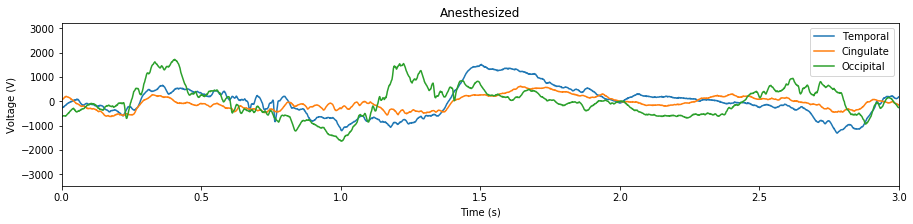

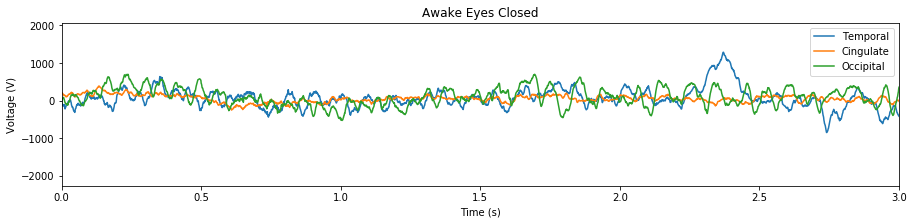

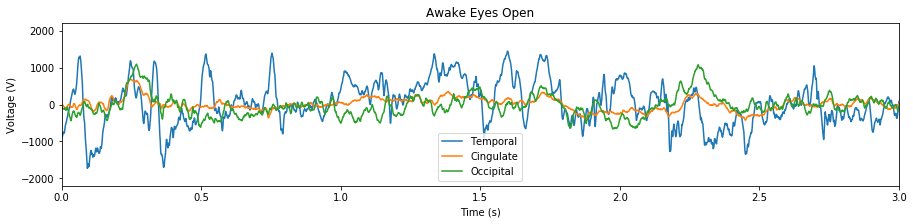

In [7]:
# Plotting anesthesized data
plt.figure(figsize=(15,3))
plt.plot(time,anestemp,label="Temporal")
plt.plot(time,anescing,label="Cingulate")
plt.plot(time,anesocci,label="Occipital")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.xlim([0,3])
plt.title('Anesthesized')
plt.legend()
# Plotting awake eyes closed data
plt.figure(figsize=(15,3))
plt.plot(time,closedtemp,label="Temporal")
plt.plot(time,closedcing,label="Cingulate")
plt.plot(time,closedocci,label="Occipital")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.xlim([0,3])
plt.title('Awake Eyes Closed')
plt.legend()
# Plotting awake eyes open data
plt.figure(figsize=(15,3))
plt.plot(time,opentemp,label="Temporal")
plt.plot(time,opencing,label="Cingulate")
plt.plot(time,openocci,label="Occipital")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.xlim([0,3])
plt.title('Awake Eyes Open')
plt.legend()

(0, 5)

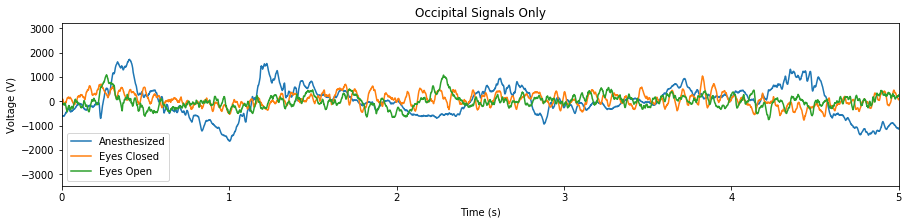

In [8]:
# Plotting occipital signals only
plt.figure(figsize=(15,3))
plt.plot(time,anes,label="Anesthesized")
plt.plot(time,eyesclosed,label="Eyes Closed")
plt.plot(time,eyesopen,label="Eyes Open")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.legend()
plt.title('Occipital Signals Only')
plt.xlim([0,5])

In [9]:
## Compute FFT
fftanes = np.fft.fft(anes)
fftclosed = np.fft.fft(eyesclosed)
fftopen = np.fft.fft(eyesopen)
spganes = np.abs(fftanes)**2
spgopen = np.abs(fftopen)**2
spgclosed = np.abs(fftclosed)**2
freqs = np.fft.fftfreq(len(anes),d=1/fs)

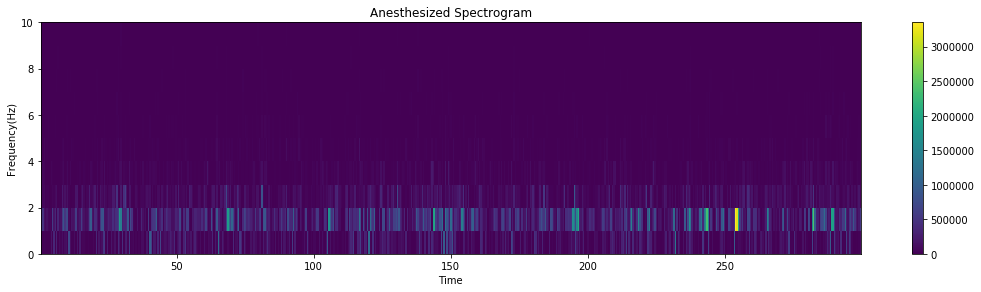

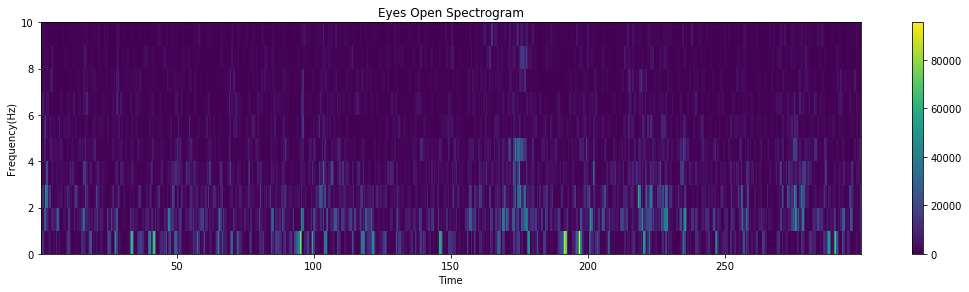

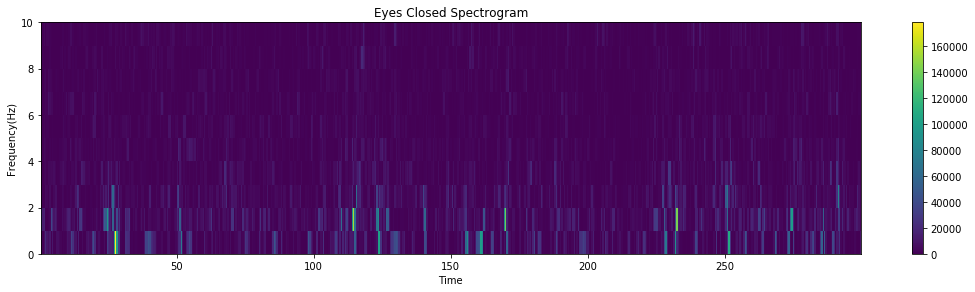

In [10]:
len_win=1
len_overlap=0.5
f_sp, t_sp, anes_sp = signal.spectrogram(anes, fs, window='rect', nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
plot_spectrogram(anes_sp, t_sp, f_sp, freq_lims=[0,10], plot_db=False)
plt.title('Anesthesized Spectrogram');
f_sp, t_sp, open_sp = signal.spectrogram(eyesopen, fs, window='rect', nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
plot_spectrogram(open_sp, t_sp, f_sp, freq_lims=[0,10], plot_db=False)
plt.title('Eyes Open Spectrogram');
f_sp, t_sp, closed_sp = signal.spectrogram(eyesclosed, fs, window='rect', nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
plot_spectrogram(closed_sp, t_sp, f_sp, freq_lims=[0,10], plot_db=False)
plt.title('Eyes Closed Spectrogram');

(0, 10)

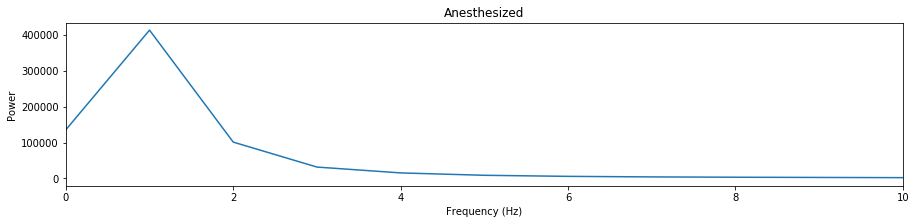

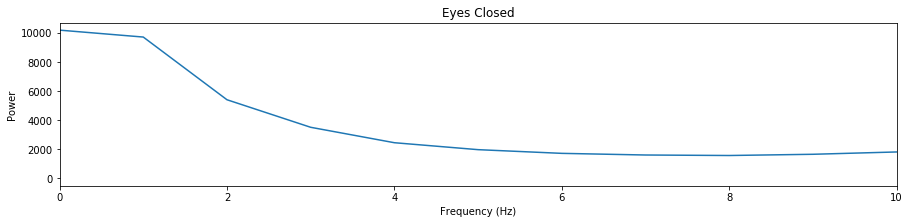

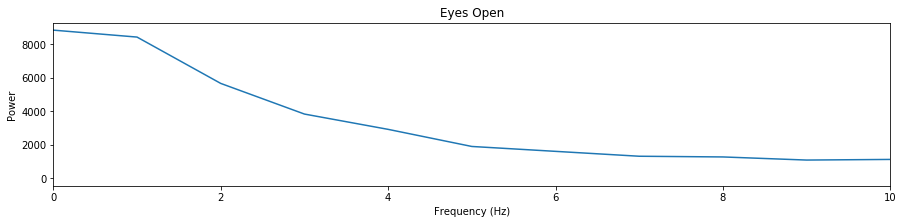

In [11]:
# Anesthesized has a lot more power.
spg_anes = np.mean(anes_sp,axis=1)
spg_open = np.mean(open_sp,axis=1)
spg_closed = np.mean(closed_sp,axis=1)
plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_anes)
plt.xlabel("Frequency (Hz)"); plt.ylabel("Power")
plt.title('Anesthesized')
plt.xlim([0,10])

plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_closed)
plt.xlabel("Frequency (Hz)"); plt.ylabel("Power")
plt.title('Eyes Closed')
plt.xlim([0,10])

plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_open,label="Eyes Open")
plt.xlabel("Frequency (Hz)"); plt.ylabel("Power")
plt.title('Eyes Open')
plt.xlim([0,10])

In [12]:
def compute_pwsp(sig, fs):
    pwsp = np.abs(np.fft.fft(sig))**2 
    freqs = np.fft.fftfreq(len(sig),d=1/fs)
    return pwsp, freqs
def doeverything(sig,cutoff,pass_zero,cutoff2="Onlyone"):
    """
    define filter, plot filter impulse response and filter the original signal
    """
    if cutoff2 == "Onlyone":
        filt_order = int(3*fs/cutoff)+1
        filt_coefs = signal.firwin(filt_order, cutoff=cutoff, fs=fs, pass_zero=pass_zero)
    else:
        filt_order = int(3*fs/(cutoff2-cutoff))+1
        filt_coefs = signal.firwin(filt_order, cutoff=(cutoff,cutoff2), fs=fs, pass_zero=pass_zero)       
        
    freq_resp = np.fft.fft(filt_coefs, n=int(fs))
    mag_resp = abs(freq_resp)**2
    ph_resp = np.angle(freq_resp)
    freqs = np.fft.fftfreq(int(fs),1/fs)

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    # plot impulse response
    t_filt = np.arange(0,len(filt_coefs))/fs
    plt.plot(t_filt,filt_coefs)
    plt.xlabel('Time(s)'); plt.ylabel('Amplitude'); 

    plt.subplot(1,3,2)
    plt.plot(freqs, mag_resp, '.')
    plt.xlabel('Frequency(Hz)'); plt.ylabel('Power'); 
    plt.xlim([0,100])

    plt.subplot(1,3,3)
    plt.plot(freqs, ph_resp, '.')
    plt.xlabel('Frequency(Hz)'); plt.ylabel('Phase'); 
    plt.xlim([0,100])

    plt.figure(figsize=(15,4))
    lfp_filt = np.convolve(sig, filt_coefs, mode='same')
    plt.plot(time, sig, alpha=0.8, label='Original')
    plt.plot(time, lfp_filt, alpha=0.8, label='Filtered')
    plt.xlim([0,5])
    plt.legend()
    plt.title('Wave Comparison')
    plt.xlabel('Time(s)');plt.ylabel('Voltage (V)')

    plt.figure(figsize=(15,4))
    pwsp, freqs_win = compute_pwsp(sig, fs)
    pwsp_s, _ = compute_pwsp(lfp_filt, fs)
    plt.plot(freqs_win, pwsp, alpha=0.8, label='Original')
    plt.plot(freqs_win, pwsp_s, alpha=0.8, label='Filtered')
    plt.xlim([-25,25])
    plt.legend()
    plt.title('Power Spectrum Comparison')
    plt.xlabel('Frequency (Hz))');plt.ylabel('Power')
    return(lfp_filt)



Anesthesized


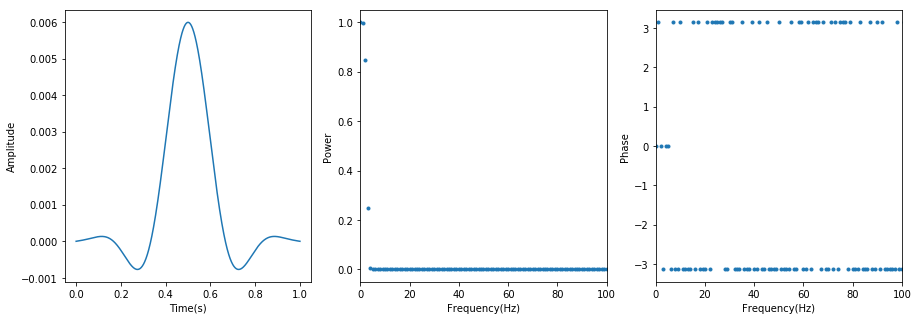

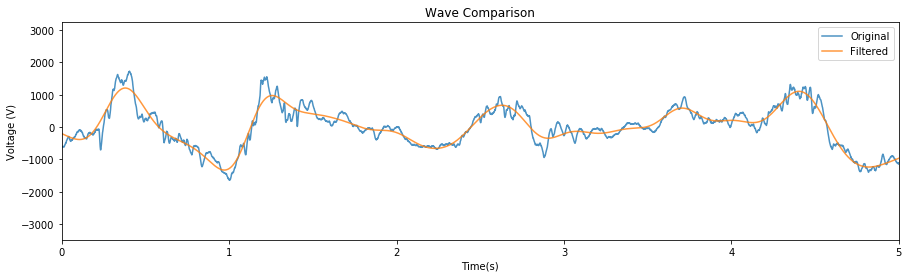

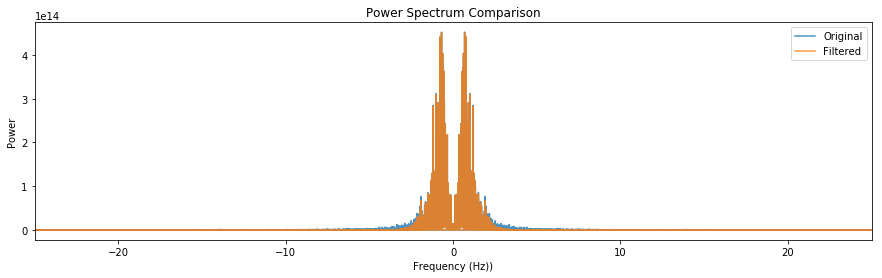

In [13]:
cutoff = 3
pass_zero=True
anes_filt = doeverything(anes,cutoff=cutoff,pass_zero=pass_zero)
print('Anesthesized')

Eyes Open


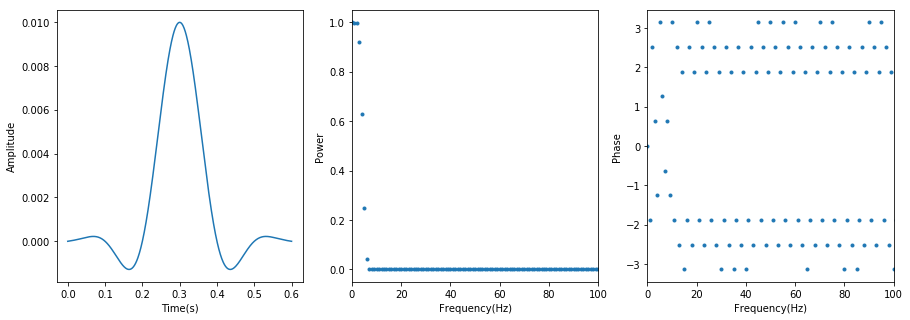

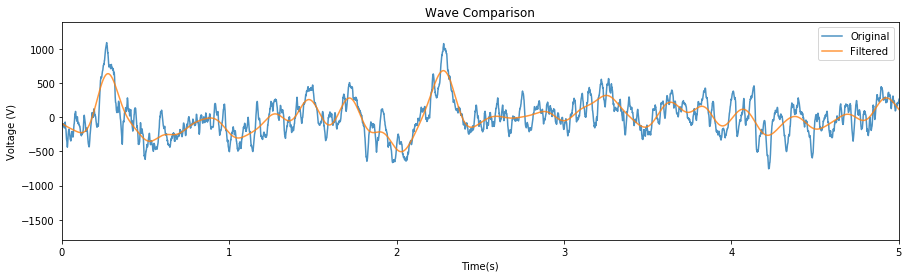

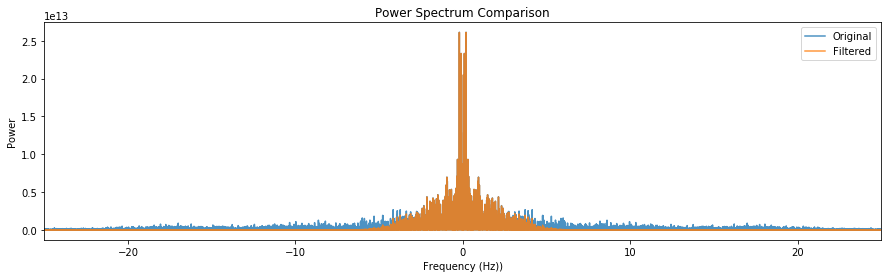

In [14]:
cutoff = 5
open_filt = doeverything(eyesopen,cutoff=cutoff,pass_zero=pass_zero)
print('Eyes Open')

Eyes Closed


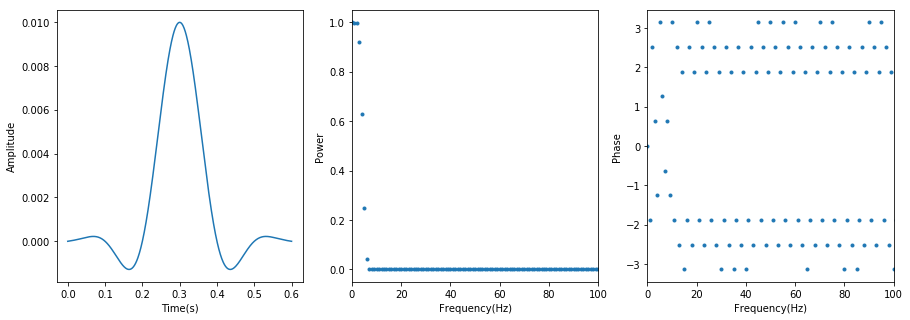

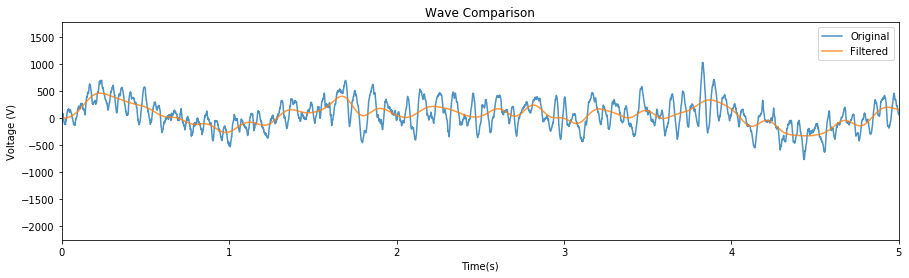

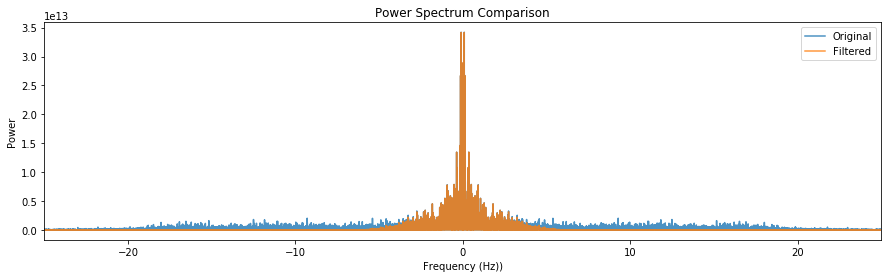

In [15]:
closed_filt = doeverything(eyesclosed,cutoff=cutoff,pass_zero=pass_zero)
print('Eyes Closed')

In [16]:
# Correlations
print('Correlation between original signals and filtered signals:')
print('Anesthesized: {}'.format(np.corrcoef(anes,anes_filt)[1,0]))
print('Eyes Open: {}'.format(np.corrcoef(eyesopen,open_filt)[1,0]))
print('Eyes Closed: {}'.format(np.corrcoef(eyesclosed,closed_filt)[1,0]))

Correlation between original signals and filtered signals:
Anesthesized: 0.9701158134237569
Eyes Open: 0.7994051322999154
Eyes Closed: 0.7612227198823485


/Users/xuanyuwu/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


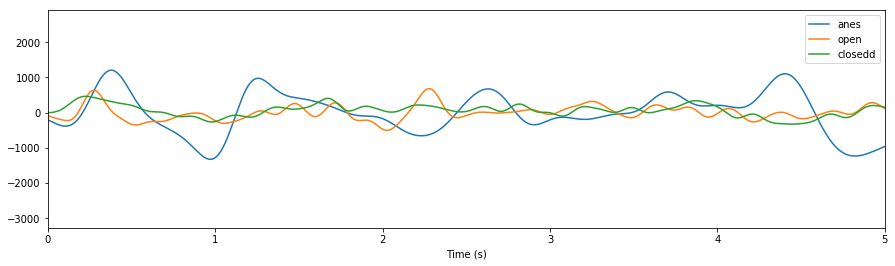

In [17]:
hil_anes = signal.hilbert(anes_filt)
hil_open = signal.hilbert(open_filt)
hil_closed = signal.hilbert(closed_filt)
plt.figure(figsize=(15,4))
plt.plot(time,hil_anes,label='anes')
plt.plot(time,hil_open,label='open')
plt.plot(time,hil_closed,label='closedd')
plt.xlim([0,5])
plt.xlabel("Time (s)")
plt.legend()

In [3]:
def xcorr(data1, data2, maxlag=100, zero_center=False):
    acf = np.zeros(maxlag)
    acf[0] = np.correlate(data1,data2) 
    for lag in range(1,maxlag):
        acf[lag] = np.correlate(data1[:-lag],data2[lag:])
    acf /= acf[0]
    if zero_center: acf[0]=np.nan 
    return acf
    
plt.figure(figsize=(15,5))
maxlag=int(fs)
t_ac = np.arange(0,maxlag/fs,1/fs)
plt.subplot(1,3,1)
plt.plot(t_ac, xcorr(lfp, lfp, maxlag, True), '.')
plt.title('LFP Autocorrelation')
plt.subplot(1,3,2)
plt.plot(t_ac, xcorr(spike_count, spike_count, maxlag, True), '.')
plt.title('Spike Count Autocorrelation')
plt.subplot(1,3,3)
plt.plot(t_ac, xcorr(spike_count, lfp, maxlag, True), '.') 
plt.title('Spike Count-LFP Cross-correlation')


SyntaxError: invalid character in identifier (<ipython-input-3-5ba28451f1b3>, line 2)